In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
!pip install XlsxWriter #для работы с файлами Exsel
!pip install openpyxl
!pip install networkx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 3.1 MB/s eta 0:00:00


In [3]:
!pip install catboost            # для CatBoost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.9 MB/s eta 0:00:00


In [21]:
import pandas as pd                  # Импорт библиотеки pandas для работы с табличными данными (DataFrame)
import numpy as np                   # Импорт библиотеки numpy для работы с массивами и числовыми операциями
import seaborn as sns                # Импорт библиотеки seaborn для создания красивых и информативных визуализаций данных
from matplotlib import pyplot as plt # Импорт функции pyplot из библиотеки matplotlib для создания графиков и визуализаций

from sklearn.preprocessing import OneHotEncoder, StandardScaler # Импорт классов для кодирования категориальных признаков и стандартизации данных
from sklearn.model_selection import train_test_split            # Импорт функций для разбиения данных на тренировочную и тестовую выборки
from tabulate import tabulate
from sklearn.linear_model import LogisticRegression    # Импорт модели логистической регрессии
from sklearn.neighbors import KNeighborsClassifier     # Импорт классификатора K-ближайших соседей
from sklearn.tree import DecisionTreeClassifier        # Импорт классификатора на основе дерева решений
from sklearn.svm import SVC                            # Импорт классификатора на основе метода опорных векторов (SVM)
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier  # Импорт классификатора на основе методов случайных деревьев, ансаблевых методов
from xgboost import XGBClassifier                   # градиентный бустинг
import xgboost as xgb                                     # Импорт классификатора на основе XGboost
from catboost import CatBoostClassifier                  # Импорт классификатора на основе CatBoost
from sklearn import metrics      # Импорт всего модуля metrics для работы с метриками оценки моделей
from sklearn.model_selection import ( # для кроссвалидации
    StratifiedKFold,
    cross_validate,
    cross_val_score,
    KFold
)
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, precision_score,
    recall_score, f1_score, roc_auc_score, average_precision_score,
    confusion_matrix, ConfusionMatrixDisplay
)
from sklearn import metrics      # Импорт всего модуля metrics для работы с метриками оценки моделей
from sklearn.metrics import (    # Импорт конкретных функций оценки из подмодуля metrics
    accuracy_score,              # Импорт функции для оценки точности (accuracy) модели, т.е. доли правильно предсказанных примеров
    balanced_accuracy_score,     # Импорт функции для оценки сбалансированной точности, учитывающей классовую неоднородность
    precision_score,             # Импорт функции для вычисления точности (precision)
    recall_score,                # Импорт функции для вычисления полноты (recall)
    confusion_matrix,            # Импорт функции для создания матрицы ошибок (confusion matrix):TN, TP, FN, FP
    multilabel_confusion_matrix, # Импорт функции для создания матрицы ошибок для случаев с многомерной классификацией
    f1_score,                    # Импорт функции для вычисления F1-меры
    roc_auc_score,               # Импорт функции для вычисления AUC-ROC (площадь под кривой приемлемости и ошибок)
    roc_curve,                   # Импорт функции для вычисления координат для построения ROC-кривой
    average_precision_score,     # Импорт функции для вычисления средней точности (average precision)
    precision_recall_curve,       # Импорт функции для вычисления и визуализации кривой "точность-полнота" (precision-recall curve)
    classification_report,
    matthews_corrcoef,           # для рассчета коэффициента корреляции Мэтьюса (Matthews Correlation Coefficient, MCC)
    cohen_kappa_score,           # для рассчета коэффициента каппы Коэна (Cohen's Kappa)
)

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.linear_model import RidgeClassifier  # Импортируем RidgeClassifier
import torch
import torch.nn as nn
import torch.optim as optim

import os
import statsmodels.api as sm      # предоставляет инструменты для статистического моделирования
import scipy.stats as stats
import networkx as nx                                      # для создания и  изучения структуры сложных сетей
import random
from sklearn.model_selection import GridSearchCV  # гиперпараметров по сетке
import time                         # для тайминга


import warnings
warnings.filterwarnings('ignore')

# Преобразования для работы с данными

In [5]:
breast_df = pd.read_csv('https://archive.ics.uci.edu/static/public/17/data.csv')
breast_df.head() # выведем первые 5 строк таблицы по прямой ссылке из статьи

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [ ]:
breast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   842302    568 non-null    int64  
 1   M         568 non-null    object 
 2   17.99     568 non-null    float64
 3   10.38     568 non-null    float64
 4   122.8     568 non-null    float64
 5   1001      568 non-null    float64
 6   0.1184    568 non-null    float64
 7   0.2776    568 non-null    float64
 8   0.3001    568 non-null    float64
 9   0.1471    568 non-null    float64
 10  0.2419    568 non-null    float64
 11  0.07871   568 non-null    float64
 12  1.095     568 non-null    float64
 13  0.9053    568 non-null    float64
 14  8.589     568 non-null    float64
 15  153.4     568 non-null    float64
 16  0.006399  568 non-null    float64
 17  0.04904   568 non-null    float64
 18  0.05373   568 non-null    float64
 19  0.01587   568 non-null    float64
 20  0.03003   568 non-null    float6

In [17]:
# будем работать с сохраненным файлом без ID
df_cytology = pd.read_csv('/content/drive/MyDrive/Hakaton/Dannie/wdbc_without_idA.csv')
df_cytology.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1.0


# Машинное обучение, подготовка данных

будем использовать использовать метод локальной линейной эмбеддинга (Locally Linear Embedding, LLE), так как LLE способен захватывать нелинейные структуры в данных. Наши данные имеют сложные взаимосвязи, LLE может быть более эффективным.
1. Сохранение локальной структуры:
   - LLE фокусируется на сохранении локальных взаимосвязей между соседними точками, что может быть полезно, если данные имеют локальную структуру.
2. Снижение размерности:
   - LLE позволяет уменьшить размерность данных, что может помочь устранить мультиколлинеарность, сохраняя при этом важные характеристики данных.


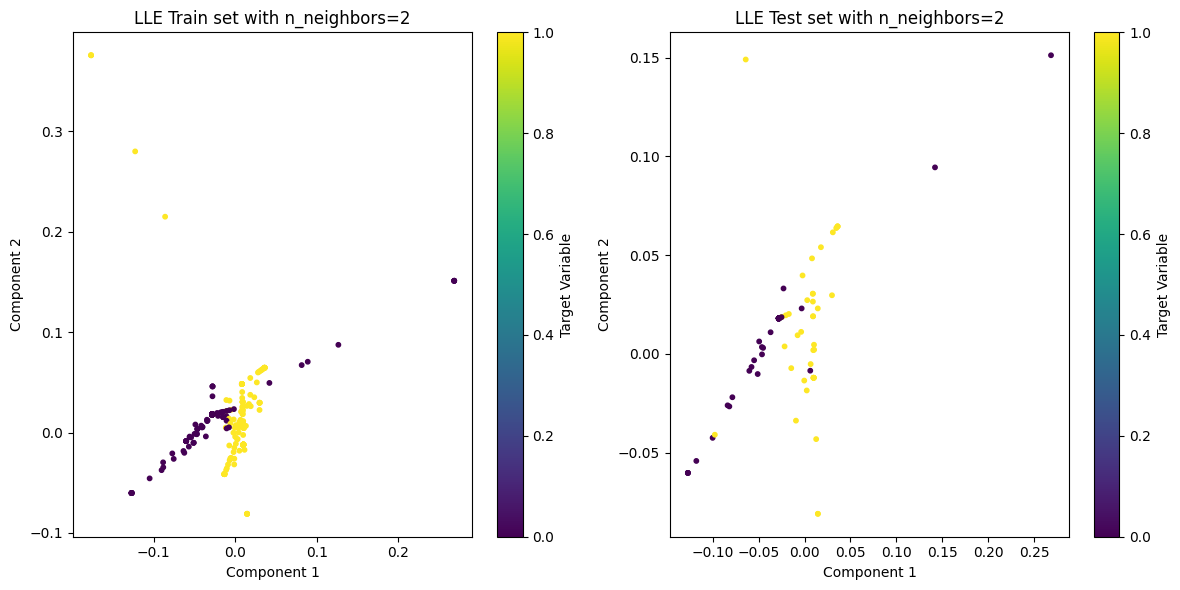

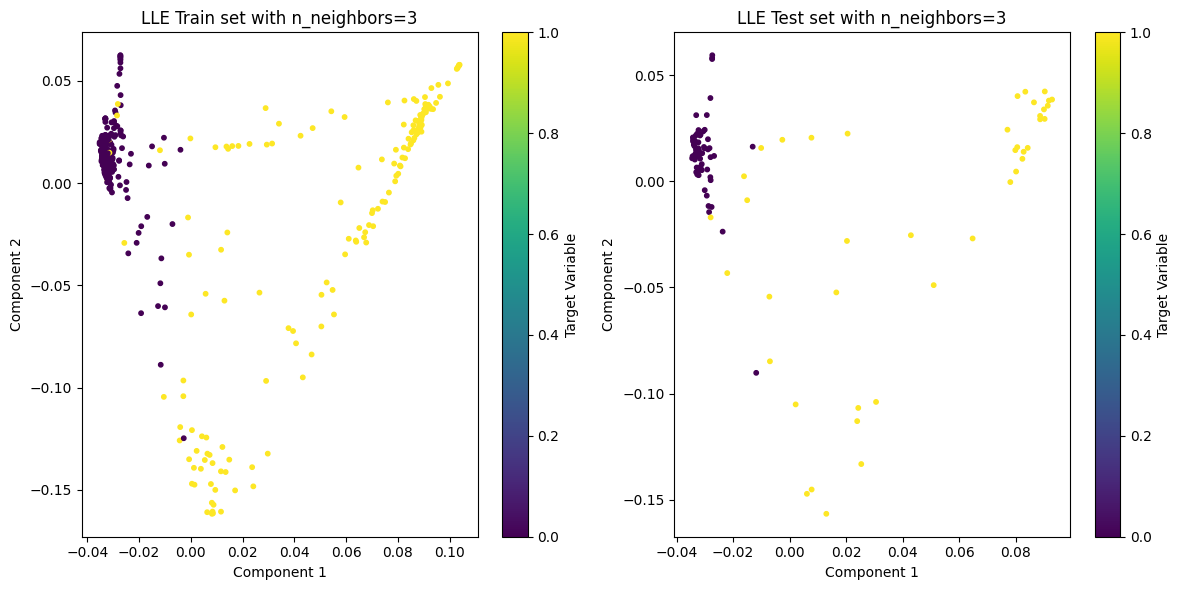

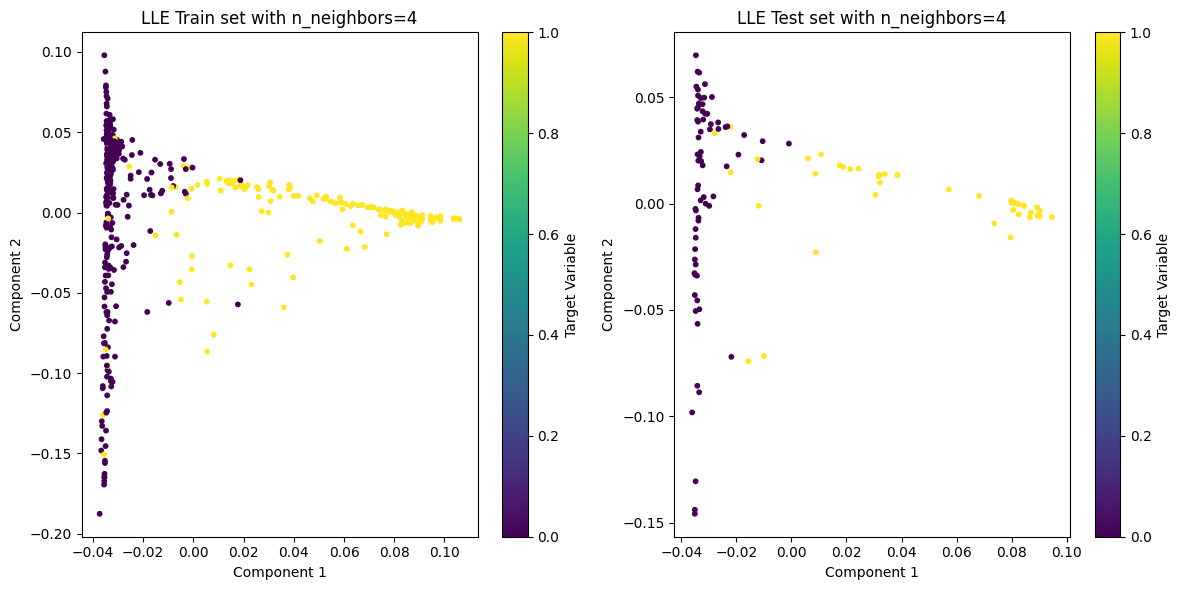

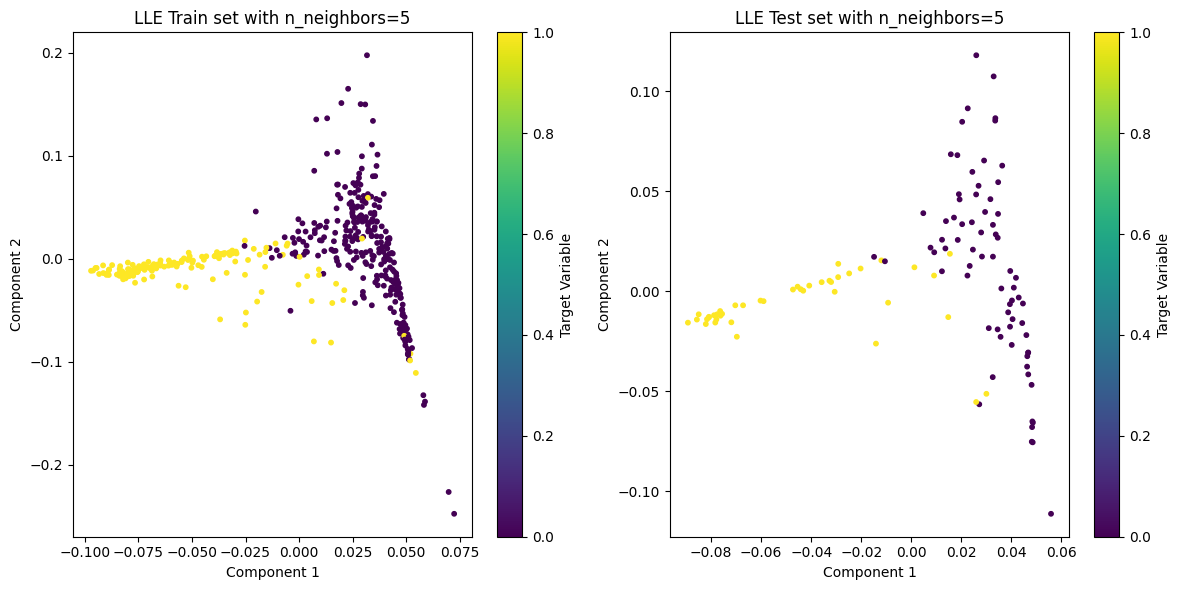

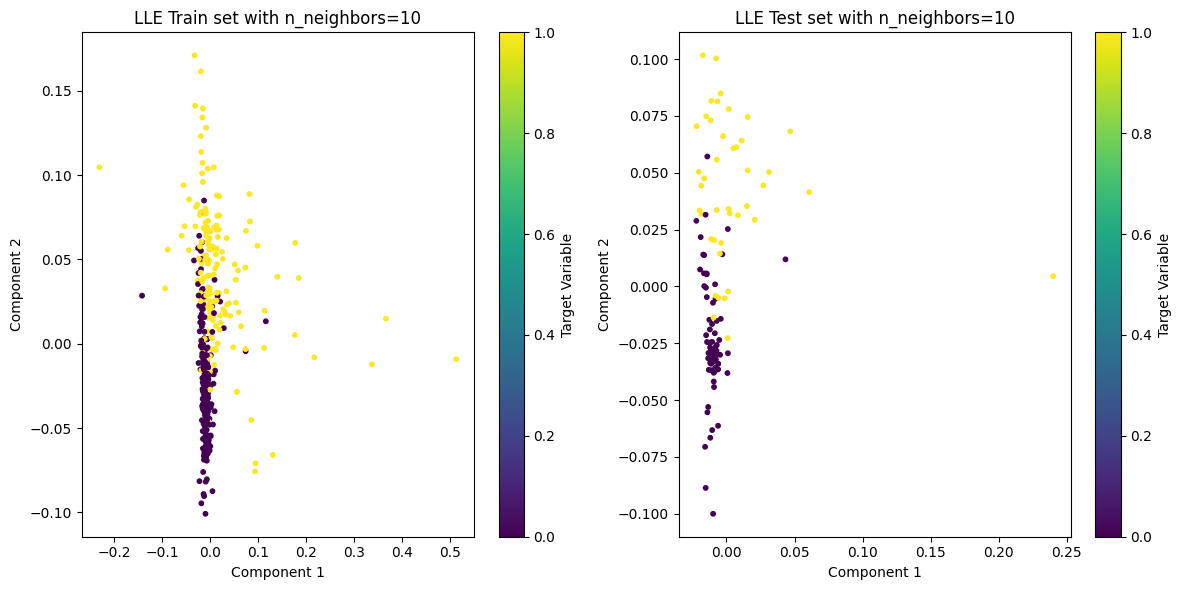

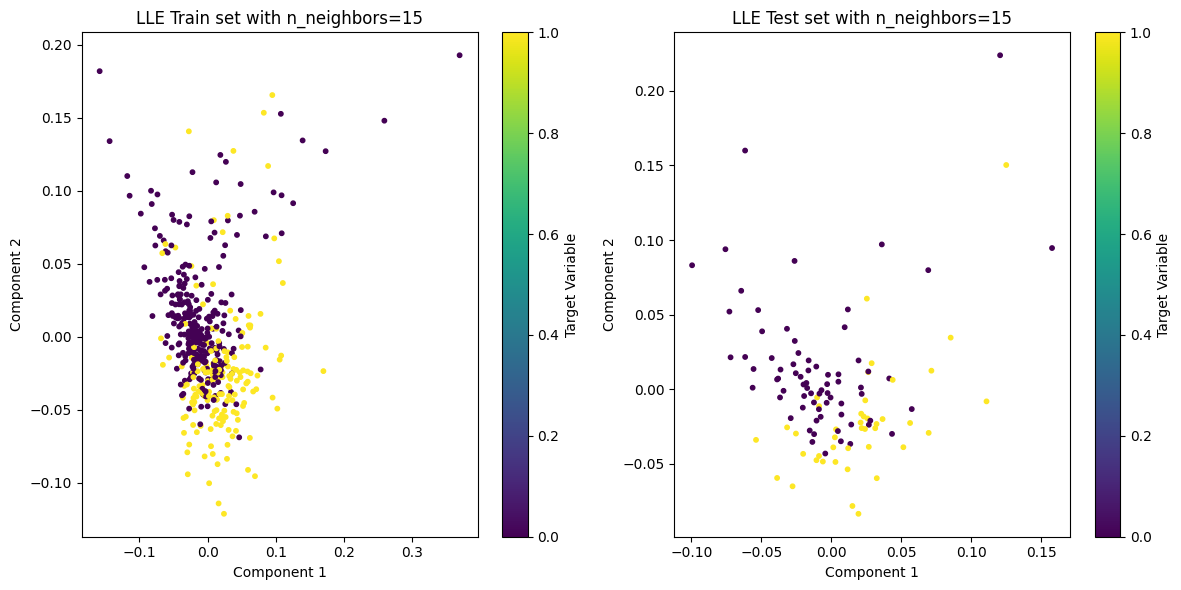

Metrics for different n_neighbors:
n_neighbors | Train MSE | Test MSE | Train R² | Test R²
2            | 0.0252     | 0.0716    | 0.8922    | 0.6924   
3            | 0.0219     | 0.0456    | 0.9065    | 0.8040   
4            | 0.0285     | 0.0544    | 0.8783    | 0.7663   
5            | 0.0257     | 0.0593    | 0.8903    | 0.7452   
10           | 0.0620     | 0.0937    | 0.7352    | 0.5974   
15           | 0.1095     | 0.1561    | 0.5319    | 0.3290   


In [22]:
# Данные
X_train, X_test, y_train, y_test = train_test_split(
    df_cytology.drop("diagnosis", axis=1),
    df_cytology["diagnosis"],
    test_size=0.2,
    random_state=42,
    shuffle=True,
    stratify=df_cytology["diagnosis"])

# Стандартизация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Параметры для подбора
n_neighbors_list = [2, 3, 4, 5, 10, 15]
n_components = 2

# Словарь для хранения метрик
metrics = []

# Подбор параметров LLE
for n_neighbors in n_neighbors_list:
    lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components, eigen_solver='dense')
    X_train_transformed = lle.fit_transform(X_train_scaled)
    X_test_transformed = lle.transform(X_test_scaled)

    # Оценка качества вложения с помощью KNeighborsRegressor
    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(X_train_transformed, y_train)
    y_train_pred = knn.predict(X_train_transformed)
    y_test_pred = knn.predict(X_test_transformed)

    # Вычисление метрик
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Сохранение метрик
    metrics.append((n_neighbors, train_mse, test_mse, train_r2, test_r2))

    # Визуализация результатов
    plt.figure(figsize=(12, 6))

    # График для обучающей выборки
    plt.subplot(1, 2, 1)
    plt.scatter(X_train_transformed[:, 0], X_train_transformed[:, 1], c=y_train, cmap='viridis', s=10)
    plt.title(f'LLE Train set with n_neighbors={n_neighbors}')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.colorbar(label='Target Variable')

    # График для тестовой выборки
    plt.subplot(1, 2, 2)
    plt.scatter(X_test_transformed[:, 0], X_test_transformed[:, 1], c=y_test, cmap='viridis', s=10)
    plt.title(f'LLE Test set with n_neighbors={n_neighbors}')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.colorbar(label='Target Variable')

    plt.tight_layout()
    plt.show()

# Вывод результатов метрик
print("Metrics for different n_neighbors:")
print("n_neighbors | Train MSE | Test MSE | Train R² | Test R²")
for metric in metrics:
    print(f"{metric[0]:<12} | {metric[1]:<10.4f} | {metric[2]:<9.4f} | {metric[3]:<9.4f} | {metric[4]:<9.4f}")

In [ ]:
# Наилучшие результаты,  достигаются при n_neighbors = 3,
# где наблюдается наименьшее значение Test MSE и наибольшее значение Test R².

In [23]:
# Делим выборку на обучающую и тестовую заново
X_train, X_test, y_train, y_test = train_test_split(
    df_cytology.drop("diagnosis", axis=1),
    df_cytology["diagnosis"],
    test_size=0.2,
    random_state=42,
    shuffle=True,
    stratify=df_cytology["diagnosis"]
)
# Применение скалера
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Применение LLE для снижения размерности
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=3)
X_train_lle = lle.fit_transform(X_train_scaled)
X_test_lle = lle.transform(X_test_scaled)

# Проверяем размеры выборок
X_train_lle.shape, X_test_lle.shape, y_train.shape, y_test.shape

((455, 2), (114, 2), (455,), (114,))

In [24]:
# функция для расчета специфичности
def calculate_specificity(true_labels, predictions):
    conf_matrix = confusion_matrix(true_labels, predictions)
    tn, fp, fn, tp = conf_matrix.ravel()
    specif = (tn / (tn + fp))
    return specif, (tn, fp, fn, tp)

In [25]:
def model_train_test(X_train, y_train, X_test, y_test, model):
    """Обучение и тестирование модели на обучающей и тестовой выборке соответственно.
    Параметры:
    X_train: объекты обучающей выборки
    y_train: значения целевой переменной обучающей выборки
    X_test: объекты тестовой выборки
    y_test: значения целевой переменной тестовой выборки
    model: модель, которая обучается и тестируется
    Возвращает: предсказания и метрики
    """
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    # Проверяем, поддерживает ли модель predict_proba
    if hasattr(model, "predict_proba"):
        proba = model.predict_proba(X_test)[:, 1]
    else:
        proba = None  # Если predict_proba не поддерживается
    accuracy = accuracy_score(y_test, pred)
    balanced_accuracy = balanced_accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, proba) if proba is not None else None
    pr_auc = average_precision_score(y_test, proba) if proba is not None else None
    specificity, conf_matrix = calculate_specificity(y_test, pred)
    tn, fp, fn, tp = conf_matrix
    print("Accuracy = {}\nBalanced_accuracy={}\nPrecision = {}\nRecall = {}\nF1_score = {}\nROC AUC = {}\nPR AUC = {}\nSpecificity = {}".format(
       round(accuracy, 4), round(balanced_accuracy, 4), round(precision, 4), round(recall, 4), round(f1, 4), round(roc_auc, 4) if roc_auc is not None else 'N/A', round(pr_auc, 4) if pr_auc is not None else 'N/A', round(specificity, 4)))

    return model, (pred, proba), (accuracy, balanced_accuracy, precision, recall, f1, roc_auc, pr_auc, specificity)


In [26]:
# Зафиксируем параметры, которые не будут меняться.
CONFIG_DATA = {
    "X_train": X_train_lle,
    "y_train": y_train,
    "X_test": X_test_lle,
    "y_test": y_test,
}

In [27]:
# добавим Ridge Regression
ans_cl = dict()
print("Результаты моделей с гиперпараметрами по умолчанию:\n")
for model_name, model in zip(
    ["LogisticRegression", "Ridge Regression", "DecisionTreeClassifier", "RandomForest", "KNeighborsClassifier", "SVM", "XGBoost",  "CatBoost", "AdaBoost", "Voting", "Stacking"],
    [LogisticRegression(random_state=42, max_iter=500),
     RidgeClassifier(random_state=42),
     DecisionTreeClassifier(random_state=42),
     RandomForestClassifier(random_state=42),
     KNeighborsClassifier(),
     SVC(probability=True),
     XGBClassifier(random_state=42),
     CatBoostClassifier(verbose=0,random_state=42),
     AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=42),random_state=42), # Изменили base_estimator на estimator
     VotingClassifier(
        estimators=[
            ("decision_tree_{}".format(i+1), DecisionTreeClassifier(random_state=42)) for i in range(5)
        ],
        voting="soft"
    ),
     StackingClassifier(
        estimators=[
            ("decision_tree_{}".format(i+1), DecisionTreeClassifier(random_state=42)) for i in range(5)
        ],
        final_estimator=DecisionTreeClassifier(random_state=42)
    )]
):
    print(model_name, end="\n\n")
    model, preds, metrics = model_train_test(model=model, **CONFIG_DATA)
    ans_cl[model_name] = (preds, metrics)
    print("-"*20)

Результаты моделей с гиперпараметрами по умолчанию:

LogisticRegression

Accuracy = 0.7632
Balanced_accuracy=0.6786
Precision = 1.0
Recall = 0.3571
F1_score = 0.5263
ROC AUC = 0.9957
PR AUC = 0.9924
Specificity = 1.0
--------------------
Ridge Regression

Accuracy = 0.9123
Balanced_accuracy=0.881
Precision = 1.0
Recall = 0.7619
F1_score = 0.8649
ROC AUC = N/A
PR AUC = N/A
Specificity = 1.0
--------------------
DecisionTreeClassifier

Accuracy = 0.9123
Balanced_accuracy=0.8958
Precision = 0.9211
Recall = 0.8333
F1_score = 0.875
ROC AUC = 0.8958
PR AUC = 0.8289
Specificity = 0.9583
--------------------
RandomForest

Accuracy = 0.9298
Balanced_accuracy=0.9097
Precision = 0.9722
Recall = 0.8333
F1_score = 0.8974
ROC AUC = 0.9727
PR AUC = 0.9641
Specificity = 0.9861
--------------------
KNeighborsClassifier

Accuracy = 0.9386
Balanced_accuracy=0.9216
Precision = 0.973
Recall = 0.8571
F1_score = 0.9114
ROC AUC = 0.9678
PR AUC = 0.9555
Specificity = 0.9861
--------------------
SVM

Accuracy =

# Данные метрик при обучении без подбора

In [31]:
# выведем метрики всех проученных алгоритмов
ans_cl_df = pd.DataFrame(ans_cl).T
ans_cl_df["Accuracy"] = ans_cl_df[1].apply(lambda x: x[0])
ans_cl_df["Balanced Accuracy"] = ans_cl_df[1].apply(lambda x: x[1])
ans_cl_df["Precision"] = ans_cl_df[1].apply(lambda x: x[2])
ans_cl_df["Recall"] = ans_cl_df[1].apply(lambda x: x[3])
ans_cl_df["F1"] = ans_cl_df[1].apply(lambda x: x[4])
ans_cl_df["ROC AUC"] = ans_cl_df[1].apply(lambda x: x[5])
ans_cl_df["PR AUC"] = ans_cl_df[1].apply(lambda x: x[6])
ans_cl_df["Specificity"] = ans_cl_df[1].apply(lambda x: x[7])
ans_cl_df = ans_cl_df.drop([0, 1], axis=1).round(4)

# Отсортируем по убыванию получившуюся таблицу
ans_cl_df.sort_values([
    "Accuracy","Balanced Accuracy", "Precision",
    "Recall", "F1", "ROC AUC", "PR AUC", 'Specificity'], ascending=False)


,Accuracy,Balanced Accuracy,Precision,Recall,F1,ROC AUC,PR AUC,Specificity
XGBoost,0.9474,0.9286,1.0000,0.8571,0.9231,0.9580,0.9579,1.0000
KNeighborsClassifier,0.9386,0.9216,0.9730,0.8571,0.9114,0.9678,0.9555,0.9861
CatBoost,0.9386,0.9167,1.0000,0.8333,0.9091,0.9868,0.9816,1.0000
SVM,0.9298,0.9097,0.9722,0.8333,0.8974,0.9732,0.9797,0.9861
RandomForest,0.9298,0.9097,0.9722,0.8333,0.8974,0.9727,0.9641,0.9861
DecisionTreeClassifier,0.9123,0.8958,0.9211,0.8333,0.8750,0.8958,0.8289,0.9583
AdaBoost,0.9123,0.8958,0.9211,0.8333,0.8750,0.8958,0.8289,0.9583
Voting,0.9123,0.8958,0.9211,0.8333,0.8750,0.8958,0.8289,0.9583
Stacking,0.9123,0.8958,0.9211,0.8333,0.8750,0.8958,0.8289,0.9583
Ridge Regression,0.9123,0.8810,1.0000,0.7619,0.8649,NaN,NaN,1.0000


# кроссвалидация  рядa моделей и оценка

In [32]:
# Определим функцию для кросс-валидации и оценки проученных моделей
def evaluate_models(X_train_scaled, y_train, X_test_scaled, y_test):
    models = {
        "LogisticRegression": LogisticRegression(random_state=42),
        "Ridge Regression": RidgeClassifier(random_state=42),
        "RandomForest": RandomForestClassifier(random_state=42),
        "SVM": SVC(probability=True),
        "KNeighborsClassifier": KNeighborsClassifier(),
        "XGBClassifier": XGBClassifier(random_state=42),
        "AdaBoost": AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=42),random_state=42),
        "CatBoost": CatBoostClassifier(random_state=42, verbose=0)  # Отключаем вывод CatBoost
    }

    # Инициализируем StratifiedKFold
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scorers = ['accuracy', 'balanced_accuracy', 'precision', 'recall', 'f1']

    # Создаем список для хранения результатов
    results = []

    for model_name, model in models.items():
        for scorer in scorers:
            # Выполним кросс-валидацию и получим оценки
            cv_results = cross_val_score(model, X_train_scaled, y_train, cv=skf, scoring=scorer).round(5)
            mean_cv_score = np.mean(cv_results)

            # Обучаем модель на всех тренировочных данных
            model.fit(X_train_scaled, y_train)

            # Прогнозы на тестовых данных
            y_pred = model.predict(X_test_scaled)

            # Оценка точности на тестовых данных
            if scorer == 'accuracy':
                test_score = accuracy_score(y_test, y_pred)
            elif scorer == 'balanced_accuracy':
                test_score = balanced_accuracy_score(y_test, y_pred)
            elif scorer == 'precision':
                test_score = precision_score(y_test, y_pred, average='weighted')
            elif scorer == 'recall':
                test_score = recall_score(y_test, y_pred)
            elif scorer == 'f1':
                test_score = f1_score(y_test, y_pred, average='weighted')

            # Добавляем результаты в список
            results.append({
                "Model": model_name,
                "Metric": scorer,
                "CV_Scores": cv_results,
                "Mean_CV_Score": mean_cv_score,
                "Test_Score": test_score
            })

    # Создаем DataFrame из списка результатов
    models_df = pd.DataFrame(results)
    return models_df

# Вызываем функцию и сохраняем результат
models_df = evaluate_models(X_train_scaled, y_train, X_test_scaled, y_test)
# print(models_df)
models_df


,Model,Metric,CV_Scores,Mean_CV_Score,Test_Score
0,LogisticRegression,accuracy,"[0.95604, 0.96703, 1.0, 0.97802, 0.96703]",0.973624,0.964912
1,LogisticRegression,balanced_accuracy,"[0.94118, 0.96775, 1.0, 0.97059, 0.96775]",0.969454,0.957341
2,LogisticRegression,precision,"[1.0, 0.94286, 1.0, 1.0, 0.94286]",0.977144,0.965185
3,LogisticRegression,recall,"[0.88235, 0.97059, 1.0, 0.94118, 0.97059]",0.952942,0.928571
4,LogisticRegression,f1,"[0.9375, 0.95652, 1.0, 0.9697, 0.95652]",0.964048,0.964725
5,Ridge Regression,accuracy,"[0.93407, 0.98901, 0.94505, 0.94505, 0.97802]",0.958240,0.964912
6,Ridge Regression,balanced_accuracy,"[0.91176, 0.98529, 0.92647, 0.9324, 0.97059]",0.945302,0.952381
7,Ridge Regression,precision,"[1.0, 1.0, 1.0, 0.96774, 1.0]",0.993548,0.966759
8,Ridge Regression,recall,"[0.82353, 0.97059, 0.85294, 0.88235, 0.94118]",0.894118,0.904762
9,Ridge Regression,f1,"[0.90323, 0.98507, 0.92063, 0.92308, 0.9697]",0.940342,0.964509


# подбор параметров Logistic Regression, Ridge Regression, XGBoost, RandomForestClassifier, Support Vector Machine, KNeighborsClassifier, CatBoost

In [34]:
%%time
# Обучение Logistic Regression с подбором гиперпараметров
log_reg = LogisticRegression()
param_grid = {
     'C': np.logspace(-10, 10, 20),                                      # контролирует степень регуляризации в модели
     'solver': ['lbfgs', 'liblinear', 'newton-cg','sag','saga'],         # Алгоритм, используемый для оптимизации
     'max_iter': [30, 70, 100, 200, 300, 500],                           # Максимальное количество итераций
     'penalty': ['l2','l1', 'elasticnet','none'],                        # определяет тип регуляризации
     'random_state': [42],
}

grid_search_log = GridSearchCV(log_reg, param_grid, cv=5)
grid_search_log.fit(X_train_lle, y_train)
best_log_reg = grid_search_log.best_estimator_
y_pred_log = best_log_reg.predict(X_test_lle)

# Вывод лучших параметров Logistic Regression
print("Лучшие параметры:", grid_search_log.best_params_)

Лучшие параметры: {'C': 37.92690190732238, 'max_iter': 30, 'penalty': 'l1', 'random_state': 42, 'solver': 'liblinear'}
CPU times: user 39 s, sys: 343 ms, total: 39.4 s
Wall time: 41.4 s


In [36]:
# Оценка качества Logistic Regression с подбором гиперпараметров
accuracy = accuracy_score(y_test, y_pred_log)
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report:")
print(classification_report(y_test, y_pred_log))
conf_matrix = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

Accuracy: 0.9473684210526315
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96        72
         1.0       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion Matrix:
[[71  1]
 [ 5 37]]


In [38]:
%%time
# Обучение Ridge Regression с подбором гиперпараметров
ridge_reg = RidgeClassifier()
param_grid = {
    'alpha': np.logspace(-10, 10, 20),  # Параметр регуляризации
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga'],    # Алгоритм оптимизации
    'max_iter': [100, 200, 500],
    'tol': [1e-4, 1e-3, 1e-2],
    'fit_intercept': [True, False],
    'random_state': [42],
}

grid_search_ridge = GridSearchCV(ridge_reg, param_grid, cv=5)
grid_search_ridge.fit(X_train_lle, y_train)
best_ridge_reg = grid_search_ridge.best_estimator_
y_pred_ridge = best_ridge_reg.predict(X_test_lle)

# Вывод лучших параметров Ridge Regression
best_params = grid_search_ridge.best_params_
print("Лучшие параметры:", best_params)

Лучшие параметры: {'alpha': 1e-10, 'fit_intercept': False, 'max_iter': 100, 'random_state': 42, 'solver': 'auto', 'tol': 0.0001}
CPU times: user 57.5 s, sys: 315 ms, total: 57.8 s
Wall time: 58.7 s


In [39]:
# Оценка качества Ridge Regression с подбором гиперпараметров
accuracy = accuracy_score(y_test, y_pred_ridge.round())  # Округляем предсказания для классификации
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred_ridge.round()))  # Округляем для отчета
conf_matrix = confusion_matrix(y_test, y_pred_ridge)
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred_ridge.round())  # Округляем для матрицы
print(conf_matrix)

Accuracy: 0.9298245614035088
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95        72
         1.0       0.97      0.83      0.90        42

    accuracy                           0.93       114
   macro avg       0.94      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114

Confusion Matrix:
[[71  1]
 [ 7 35]]


In [41]:
%%time
# Обучение XGBoost с подбором гиперпараметров
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Определение сетки гиперпараметров для поиска
param_grid_xgb = {
    'n_estimators': [50, 100, 200],  # Количество деревьев в модели
    'max_depth': [3, 5, 10],         # Максимальная глубина дерева
    'learning_rate': [0.01, 0.1, 0.2],  # Скорость обучения (шаг)
    'subsample': [0.5, 0.75, 1.0],   # Доля выборки, используемой для обучения каждого дерева
    'colsample_bytree': [0.5, 0.75, 1.0],  # Доля признаков, используемых для построения каждого дерева
    'gamma': [0, 0.1, 0.2]           # Минимальное уменьшение потерь для разделения узла
}

# Настройка GridSearchCV
grid_search_xgb = GridSearchCV(xgb_classifier, param_grid_xgb, cv=5)
grid_search_xgb.fit(X_train_lle, y_train)
best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_lle)

# Вывод лучших параметров и времени выполнения XGBoost с подбором гиперпараметров
print("Лучшие параметры:", grid_search_xgb.best_params_)

Лучшие параметры: {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
CPU times: user 5min 3s, sys: 7.39 s, total: 5min 10s
Wall time: 3min 8s


In [42]:
# Оценка качества классификатора XGBoost с подбором гиперпараметров
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

Accuracy: 0.9385964912280702
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95        72
         1.0       1.00      0.83      0.91        42

    accuracy                           0.94       114
   macro avg       0.96      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114

Confusion Matrix:
[[72  0]
 [ 7 35]]


In [45]:
%%time
# Обучение RandomForestClassifier с подбором гиперпараметров
rf_classifier = RandomForestClassifier()
param_grid = {
    'n_estimators': [10, 25, 50, 100],                             #
    'max_features': ['auto', 'sqrt', 'log2'],                      #
    'max_depth': [None, 7, 10, 20],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42],
    'bootstrap': [True, False],
    'class_weight': [None],
    'max_samples': [0.5, 0.75, 1.0],
    'criterion': ['gini', 'entropy']
}

grid_search_rf = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search_rf.fit(X_train_lle, y_train)
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_lle)

# Вывод лучших параметров и времени выполнения RandomForestClassifier с подбором гиперпараметров
print("Лучшие параметры:", grid_search_rf.best_params_)

Лучшие параметры: {'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_samples': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 10, 'random_state': 42}
CPU times: user 13min 8s, sys: 4.66 s, total: 13min 12s
Wall time: 13min 21s


In [46]:
# Оценка качества классификатора RandomForestClassifier с подбором гиперпараметров
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Определение и вывод матрицы ошибок
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9385964912280702
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95        72
         1.0       1.00      0.83      0.91        42

    accuracy                           0.94       114
   macro avg       0.96      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114

Confusion Matrix:
[[72  0]
 [ 7 35]]


In [48]:
%%time
# Обучение Support Vector Machine с подбором гиперпараметров
svm_classifier = svm.SVC()
param_grid = {
    'C': [0.1, 1, 2],
    'kernel': ['linear', 'rbf', 'sigmoid', 'poly'],  # Добавляем полиномиальное ядро
    'degree': [2, 3, 4],  # Этот параметр будет применен только для полиномиального ядра
    'gamma': ['scale', 'auto'],
    'shrinking': [True, False],
    'tol': [1e-4, 1e-3, 1e-2],
    'max_iter': [-1, 100, 200]
}

grid_search_svm = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search_svm.fit(X_train_lle, y_train)  # Исправлено на grid_search_svm
best_svm = grid_search_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test_lle)

# Вывод лучших параметров и времени выполнения Support Vector Machine с подбором гиперпараметров
print("Лучшие параметры:", grid_search_svm.best_params_)

Лучшие параметры: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.0001}
CPU times: user 45.1 s, sys: 110 ms, total: 45.2 s
Wall time: 45.8 s


In [49]:
# Оценка качества классификатора Support Vector Machine с подбором гиперпараметров
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Определение и вывод матрицы ошибок
conf_matrix = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9298245614035088
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95        72
         1.0       0.97      0.83      0.90        42

    accuracy                           0.93       114
   macro avg       0.94      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114

Confusion Matrix:
[[71  1]
 [ 7 35]]


In [52]:
# from sklearn.neighbors import KNeighborsClassifier
%%time
# Обучение KNeighborsClassifier с подбором гиперпараметров
knn_classifier = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [30, 40, 50]
}

grid_search_knn = GridSearchCV(knn_classifier, param_grid, cv=5)
grid_search_knn.fit(X_train_lle, y_train)  # Обучение модели
best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test_lle)

# Вывод лучших параметров и времени выполнения KNeighborsClassifier с подбором гиперпараметров
print("Лучшие параметры:", grid_search_knn.best_params_)

Лучшие параметры: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
CPU times: user 9.91 s, sys: 105 ms, total: 10 s
Wall time: 10.1 s


In [53]:
# Оценка качества классификатора KNeighborsClassifier с подбором гиперпараметров
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Определение и вывод матрицы ошибок
conf_matrix = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9385964912280702
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95        72
         1.0       1.00      0.83      0.91        42

    accuracy                           0.94       114
   macro avg       0.96      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114

Confusion Matrix:
[[72  0]
 [ 7 35]]


In [55]:
%%time
# Установка параметров для CatBoost
catboost_classifier = CatBoostClassifier(silent=True)  # silent=True, чтобы отключить вывод информации в процессе обучения

# Определение сетки гиперпараметров для подбора
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    'border_count': [32, 50, 100],
    'loss_function': ['Logloss', 'CrossEntropy']
}

# Подбор гиперпараметров с использованием GridSearchCV
grid_search_catboost = GridSearchCV(catboost_classifier, param_grid, cv=5)
grid_search_catboost.fit(X_train_lle, y_train)  # Обучение модели
best_catboost = grid_search_catboost.best_estimator_
y_pred_catboost = best_catboost.predict(X_test_lle)

# Вывод лучших параметров и времени выполнения CatBoost с подбором гиперпараметров
print("Лучшие параметры:", grid_search_catboost.best_params_)

Лучшие параметры: {'border_count': 32, 'depth': 4, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.01, 'loss_function': 'Logloss'}
CPU times: user 9min 1s, sys: 1min 40s, total: 10min 42s
Wall time: 7min 41s


In [56]:
# Оценка качества классификатора CatBoost с подбором гиперпараметров
accuracy = accuracy_score(y_test, y_pred_catboost)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred_catboost))

# Определение и вывод матрицы ошибок
conf_matrix = confusion_matrix(y_test, y_pred_catboost)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9385964912280702
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95        72
         1.0       0.97      0.86      0.91        42

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114

Confusion Matrix:
[[71  1]
 [ 6 36]]


In [58]:
# Обучение SVM с вероятностными оценками
best_svm = SVC(probability=True)
best_svm.fit(X_train_lle, y_train)  # Обучение модели

# Обучение RidgeClassifier
best_ridge_reg = RidgeClassifier()
best_ridge_reg.fit(X_train_lle, y_train)  # Обучение модели

# Функция для расчета метрик
def calculate_metrics(y_true, y_pred, y_scores):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Balanced Accuracy': balanced_accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'F1': f1_score(y_true, y_pred, average='weighted'),
        'ROC AUC': roc_auc_score(y_true, y_scores),  # Используем вероятности для ROC AUC
        'PR AUC': average_precision_score(y_true, y_scores),  # Используем вероятности для PR AUC
        'MCC': matthews_corrcoef(y_true, y_pred),  # Коэффициент корреляции Мэтьюса
        'Cohen Kappa': cohen_kappa_score(y_true, y_pred)  # Коэффициент каппы Коэна
    }

# Получение предсказаний и вероятностей для всех моделей
y_pred_log = best_log_reg.predict(X_test_lle)
y_scores_log = best_log_reg.predict_proba(X_test_lle)[:, 1]

y_pred_ridge_reg = best_ridge_reg.predict(X_test_lle)
decision_scores_ridge = best_ridge_reg.decision_function(X_test_lle)
y_scores_ridge_reg = 1 / (1 + np.exp(-decision_scores_ridge))  # Преобразование в вероятности

y_pred_xgb = best_xgb.predict(X_test_lle)
y_scores_xgb = best_xgb.predict_proba(X_test_lle)[:, 1]

y_pred_rf = best_rf.predict(X_test_lle)
y_scores_rf = best_rf.predict_proba(X_test_lle)[:, 1]

y_pred_svm = best_svm.predict(X_test_lle)
y_scores_svm = best_svm.predict_proba(X_test_lle)[:, 1]

y_pred_catboost = best_catboost.predict(X_test_lle)
y_scores_catboost = best_catboost.predict_proba(X_test_lle)[:, 1]

y_pred_knn = best_knn.predict(X_test_lle)
y_scores_knn = best_knn.predict_proba(X_test_lle)[:, 1]

# Теперь можно рассчитать метрики для всех моделей
metrics_log = calculate_metrics(y_test, y_pred_log, y_scores_log)
metrics_ridge_reg = calculate_metrics(y_test, y_pred_ridge_reg, y_scores_ridge_reg)
metrics_xgb = calculate_metrics(y_test, y_pred_xgb, y_scores_xgb)
metrics_rf = calculate_metrics(y_test, y_pred_rf, y_scores_rf)
metrics_svm = calculate_metrics(y_test, y_pred_svm, y_scores_svm)
metrics_catboost = calculate_metrics(y_test, y_pred_catboost, y_scores_catboost)
metrics_knn = calculate_metrics(y_test, y_pred_knn, y_scores_knn)

# Создание DataFrame для хранения результатов
metrics_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Ridge Regression', 'XGBoost', 'Random Forest', 'SVM', 'CatBoost', 'KNN'],
    'Accuracy': [metrics_log['Accuracy'], metrics_ridge_reg['Accuracy'], metrics_xgb['Accuracy'], metrics_rf['Accuracy'], metrics_svm['Accuracy'], metrics_catboost['Accuracy'], metrics_knn['Accuracy']],
    'Balanced Accuracy': [metrics_log['Balanced Accuracy'], metrics_ridge_reg['Balanced Accuracy'], metrics_xgb['Balanced Accuracy'], metrics_rf['Balanced Accuracy'], metrics_svm['Balanced Accuracy'], metrics_catboost['Balanced Accuracy'], metrics_knn['Balanced Accuracy']],
    'Precision': [metrics_log['Precision'], metrics_ridge_reg['Precision'], metrics_xgb['Precision'], metrics_rf['Precision'], metrics_svm['Precision'], metrics_catboost['Precision'], metrics_knn['Precision']],
    'Recall': [metrics_log['Recall'], metrics_ridge_reg['Recall'], metrics_xgb['Recall'], metrics_rf['Recall'], metrics_svm['Recall'], metrics_catboost['Recall'], metrics_knn['Recall']],
    'F1': [metrics_log['F1'], metrics_ridge_reg['F1'], metrics_xgb['F1'], metrics_rf['F1'], metrics_svm['F1'], metrics_catboost['F1'], metrics_knn['F1']],
    'ROC AUC': [metrics_log['ROC AUC'], metrics_ridge_reg['ROC AUC'], metrics_xgb['ROC AUC'], metrics_rf['ROC AUC'], metrics_svm['ROC AUC'], metrics_catboost['ROC AUC'], metrics_knn['ROC AUC']],
    'PR AUC': [metrics_log['PR AUC'], metrics_ridge_reg['PR AUC'], metrics_xgb['PR AUC'], metrics_rf['PR AUC'], metrics_svm['PR AUC'], metrics_catboost['PR AUC'], metrics_knn['PR AUC']],
    'MCC': [metrics_log['MCC'], metrics_ridge_reg['MCC'], metrics_xgb['MCC'], metrics_rf['MCC'], metrics_svm['MCC'], metrics_catboost['MCC'], metrics_knn['MCC']],
    'Cohen Kappa': [metrics_log['Cohen Kappa'], metrics_ridge_reg['Cohen Kappa'], metrics_xgb['Cohen Kappa'], metrics_rf['Cohen Kappa'], metrics_svm['Cohen Kappa'], metrics_catboost['Cohen Kappa'], metrics_knn['Cohen Kappa']]
})

# Print the metrics DataFrame
# print(metrics_df.sort_values(by='F1', ascending=False))
metrics_df.sort_values(by='F1', ascending=False)


,Model,Accuracy,Balanced Accuracy,Precision,Recall,F1,ROC AUC,PR AUC,MCC,Cohen Kappa
0,Logistic Regression,0.947368,0.933532,0.948753,0.947368,0.946764,0.996693,0.994400,0.887244,0.884615
5,CatBoost,0.938596,0.921627,0.940829,0.938596,0.937684,0.989583,0.984434,0.868766,0.864700
2,XGBoost,0.938596,0.916667,0.944037,0.938596,0.937229,0.977183,0.973465,0.871489,0.863309
3,Random Forest,0.938596,0.916667,0.944037,0.938596,0.937229,0.970238,0.961840,0.871489,0.863309
6,KNN,0.938596,0.916667,0.944037,0.938596,0.937229,0.963128,0.949975,0.871489,0.863309
4,SVM,0.929825,0.909722,0.933086,0.929825,0.928529,0.973214,0.979679,0.850378,0.844581
1,Ridge Regression,0.912281,0.880952,0.922978,0.912281,0.909202,0.995701,0.992354,0.817918,0.801670


# нейронная сеть

Epoch [10/100], Loss: 0.6891
Epoch [20/100], Loss: 0.6719
Epoch [30/100], Loss: 0.6581
Epoch [40/100], Loss: 0.6539
Epoch [50/100], Loss: 0.6486
Epoch [60/100], Loss: 0.6422
Epoch [70/100], Loss: 0.6318
Epoch [80/100], Loss: 0.6140
Epoch [90/100], Loss: 0.5850
Epoch [100/100], Loss: 0.5342


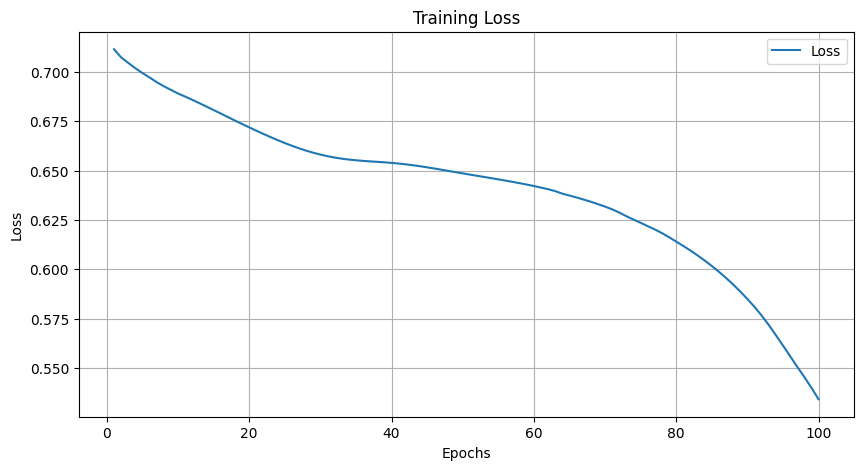

In [61]:
# Преобразование данных в тензоры PyTorch
X_train_tensor = torch.FloatTensor(X_train_lle)
X_test_tensor = torch.FloatTensor(X_test_lle)
y_train_tensor = torch.FloatTensor(y_train.values)  # Преобразуем в тензор
y_test_tensor = torch.FloatTensor(y_test.values)

# Определение нейронной сети
class BottleneckNN(nn.Module):
    def __init__(self):
        super(BottleneckNN, self).__init__()
        self.fc1 = nn.Linear(2, 128)  # Входной слой
        self.fc2 = nn.Linear(128, 64)  # Скрытый слой 1
        self.fc3 = nn.Linear(64, 32)   # Скрытый слой 2
        self.fc4 = nn.Linear(32, 1)    # Выходной слой
        self.sigmoid = nn.Sigmoid()    # Сигмоидная функция активации

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # ReLU активация для скрытых слоев
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.sigmoid(self.fc4(x))  # Сигмоида для выходного слоя
        return x

# Инициализация модели, функции потерь и оптимизатора
model = BottleneckNN()
criterion = nn.BCELoss()  # Бинарная кросс-энтропия
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Обучение модели
num_epochs = 100
losses = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs.squeeze(), y_train_tensor)  # Убираем лишнюю размерность
    loss.backward()
    optimizer.step()

    losses.append(loss.item())  # Сохраняем значение потерь
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Визуализация потерь
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), losses, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.grid()
plt.show()

Accuracy: 0.69
Balanced Accuracy: 0.58
Precision: 1.00
Recall: 0.17
F1 Score: 0.29
ROC AUC: 0.99
PR AUC: 0.99


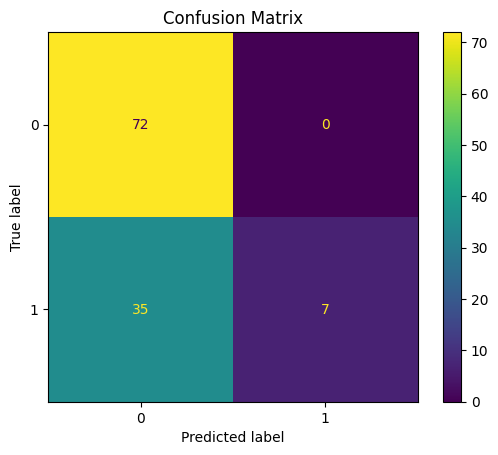

In [62]:
# Оценка модели
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    y_pred = (y_pred_tensor.squeeze() > 0.5).float()  # Применяем порог 0.5 для бинарной классификации

# Преобразование y_test_tensor в NumPy для вычисления метрик
y_test_np = y_test_tensor.numpy()

# Вычисление метрик
accuracy = accuracy_score(y_test_np, y_pred.numpy())
balanced_accuracy = balanced_accuracy_score(y_test_np, y_pred.numpy())
precision = precision_score(y_test_np, y_pred.numpy())
recall = recall_score(y_test_np, y_pred.numpy())
f1 = f1_score(y_test_np, y_pred.numpy())
roc_auc = roc_auc_score(y_test_np, y_pred_tensor.numpy())
pr_auc = average_precision_score(y_test_np, y_pred_tensor.numpy())

# Вывод метрик
print(f'Accuracy: {accuracy:.2f}')
print(f'Balanced Accuracy: {balanced_accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')
print(f'PR AUC: {pr_auc:.2f}')

# Матрица классификации
conf_matrix = confusion_matrix(y_test_np, y_pred.numpy())
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()
plt.title('Confusion Matrix')
plt.show()
